In [90]:
# Домашнє завдання. Частина третя
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

In [3]:
import gdown

url = 'https://drive.google.com/uc?id=14_jwQW9eG-hzPrYtlZa4PV-F6xXvrW3Z'
output = '/content/bestsellers_with_categories.csv'
gdown.download(url, output, quiet=False)

import pandas as pd

table = pd.read_csv('bestsellers_with_categories.csv')


Downloading...
From: https://drive.google.com/uc?id=14_jwQW9eG-hzPrYtlZa4PV-F6xXvrW3Z
To: /content/bestsellers_with_categories.csv
100%|██████████| 51.2k/51.2k [00:00<00:00, 56.4MB/s]


In [4]:
#Виведіть перші п'ять рядків (використовується функція head)
print(table.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [6]:
#Виведіть розміри датасету (використовуйте атрибут shape)
rows, columns = table.shape

print("Rows:", rows)
print("Columns:", columns)

Rows: 550
Columns: 7


**Про скільки книг зберігає дані датасет? Відповідь: 550**

In [7]:
table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(table.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


# **Первинне дослідження даних**

In [8]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
na_counts = table.isna().sum()
print(na_counts)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


**Відповідь: Чи є в якихось змінних пропуски? Ні**

In [10]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
column_genre = table['genre'].unique()
print(column_genre)

['Non Fiction' 'Fiction']


**Відповідь: Non Fiction, Fiction**

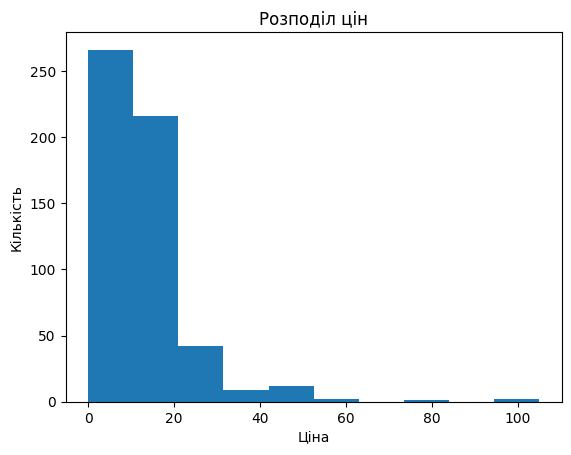

In [13]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
table['price'].plot(kind='hist', bins=10)
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.show()

In [14]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = table['price'].max()
min_price = table['price'].min()
mean_price = table['price'].mean()
price_median = table['price'].median()
print(max_price, min_price, mean_price, price_median)

105 0 13.1 11.0


**Максимальна ціна? Відповідь: 105**

**Мінімальна ціна? Відповідь: 0**

**Середня ціна? Відповідь: 13.1**

**Медіанна ціна? Відповідь: 11**

# **Пошук та сортування даних**

In [15]:
max_user_rating = table['user_rating'].max()
print(max_user_rating)

4.9


**Який рейтинг у датасеті найвищий? Відповідь: 4.9**

In [25]:
books_with_max_rating = table[table['user_rating'] == max_user_rating]
count_books_with_max_rating = books_with_max_rating.shape[0]
print(count_books_with_max_rating)

52


**Скільки книг мають такий рейтинг? Відповідь: 52**

In [31]:
max_reviews = table['reviews'].max()
book_with_max_reviews = table[table['reviews'] == max_reviews]
book_title = book_with_max_reviews['name'].values[0]
book_author = book_with_max_reviews['author'].values[0]
print(book_title)
print(book_author)

Where the Crawdads Sing
Delia Owens


**Яка книга має найбільше відгуків? Відповідь: 'Where the Crawdads Sing' Delia Owens**

In [32]:
books_2015 = table[table['year'] == 2015]
max_price_2015 = books_2015['price'].max()
book_with_max_price_2015 = books_2015[books_2015['price'] == max_price_2015]
book_title = book_with_max_price_2015['name'].values[0]
book_author = book_with_max_price_2015['author'].values[0]
print(book_title)
print(book_author)

Publication Manual of the American Psychological Association, 6th Edition
American Psychological Association


**З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 'Publication Manual of the American Psychological Association, 6th Edition', American Psychological Association**

In [33]:
books_2010 = table[(table['genre'] == 'Fiction') & (table['year'] == 2010)]
count_fiction_2010 = books_2010.shape[0]
print(count_fiction_2010)

20


**Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20**

In [44]:
books_4_9_2010_2011 = table[(table['user_rating'] == 4.9) & (table['year'].isin([2010, 2011]))]
count_books_4_9_2010_2011 = books_4_9_2010_2011.shape[0]
print(count_books_4_9_2010_2011)

1


**Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь:1**

In [48]:
books_2015 = table[(table['price'] < 8) & (table['year'] == 2015)]
sort_books_2015 = books_2015.sort_values('price')
print(sort_books_2015)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [51]:
last_book = sort_books_2015.tail(1)
last_book_title = last_book['name'].values[0]
last_book_author = last_book['author'].values[0]
print(last_book_title)
print(last_book_author)

Old School (Diary of a Wimpy Kid #10)
Jeff Kinney


**Яка книга остання у відсортованому списку? Відповідь: 'Old School (Diary of a Wimpy Kid #10)' Jeff Kinney**

# **Агрегування даних та з'єднання таблиць**

In [55]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg,
#для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

genre_prices = table.groupby('genre')['price'].agg(['min', 'max'])
print(genre_prices)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


**Максимальна ціна для жанру Fiction: 82**

**Мінімальна ціна для жанру Fiction: 0**

**Максимальна ціна для жанру Non Fiction: 105**

**Мінімальна ціна для жанру Non Fiction: 0**

In [56]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для
#підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

author_counts = table.groupby('author').agg(count=('name', 'count'))
author_counts = author_counts.reset_index()
author_counts.columns = ['author', 'count']
print(author_counts.head())
rows, columns = table.shape
print("Rows:", rows)
print("Columns:", columns)

                       author  count
0            Abraham Verghese      2
1              Adam Gasiewski      1
2               Adam Mansbach      1
3                   Adir Levy      1
4  Admiral William H. McRaven      1
Rows: 550
Columns: 7


**Якої розмірності вийшла таблиця? Відповідь: 248 rows x 2 columns**

In [60]:
author_index = author_counts['count'].idxmax()
author = author_counts['author'][author_index]
print(author)

Jeff Kinney


**Який автор має найбільше книг? Відповідь: Jeff Kinney**

In [67]:
books_count = author_counts['count'][author_index]
print(books_count)

12


**Скільки книг цього автора? Відповідь: 12**

In [71]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
#Не беріть усі стовпці, виберете тільки потрібні

author_ratings = table.groupby('author')['user_rating'].agg(avg_rating='mean')
author_ratings = author_ratings.reset_index()
author_ratings.columns = ['author', 'avg_rating']

print(author_ratings)

                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


In [83]:
author_index = author_ratings['avg_rating'].idxmin()
author = author_ratings['author'][author_index]
print(author)

Donna Tartt


**У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt**

In [77]:
author_rating = author_ratings['avg_rating'][author_index]
print(author_rating)

3.9


**Який у цього автора середній рейтинг? Відповідь: 3.9**

In [86]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
combined_df = pd.concat([author_counts, author_ratings], axis=1)
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]
print(combined_df)

                         author  count  avg_rating
0              Abraham Verghese      2    4.600000
1                Adam Gasiewski      1    4.400000
2                 Adam Mansbach      1    4.800000
3                     Adir Levy      1    4.800000
4    Admiral William H. McRaven      1    4.700000
..                          ...    ...         ...
243             Walter Isaacson      3    4.566667
244               William Davis      2    4.400000
245            William P. Young      2    4.600000
246            Wizards RPG Team      3    4.800000
247                Zhi Gang Sha      2    4.600000

[248 rows x 3 columns]


In [87]:
sorted_df = combined_df.sort_values(by=['count', 'avg_rating'], ascending=True)
print(sorted_df)

                                 author  count  avg_rating
171                      Muriel Barbery      1    4.000000
43                         Chris Cleave      1    4.100000
109                   Ian K. Smith M.D.      1    4.100000
186                        Pierre Dukan      1    4.100000
81                     Elizabeth Strout      1    4.200000
..                                  ...    ...         ...
11   American Psychological Association     10    4.500000
226                     Suzanne Collins     11    4.663636
92                         Gary Chapman     11    4.736364
197                        Rick Riordan     11    4.772727
120                         Jeff Kinney     12    4.800000

[248 rows x 3 columns]


In [88]:
first_author = sorted_df.iloc[0]['author']
print(first_author)

Muriel Barbery


**Який автор перший у списку? Відповідь: Muriel Barbery**

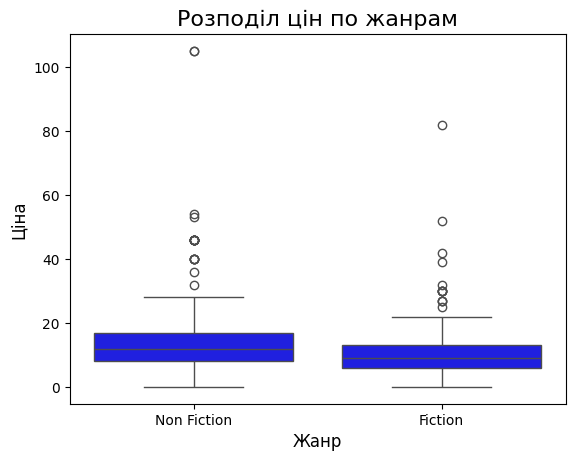

In [102]:
#Розподіл цін на книги для кожного жанру
sns.boxplot(x='genre', y='price', data=table, color='blue', dodge=True)
plt.title('Розподіл цін по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Ціна', fontsize=12)
plt.show()


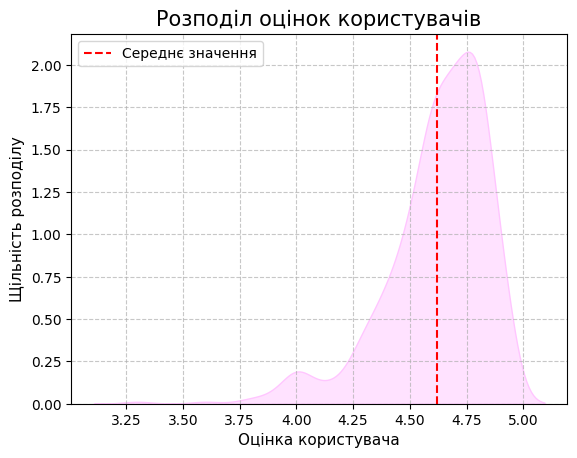

In [104]:
#Щільність розподілу оцінок користувачів
sns.kdeplot(data=table['user_rating'], fill=True, color='#ffc6ff', alpha=0.5)
plt.title('Розподіл оцінок користувачів', fontsize=15)
plt.xlabel('Оцінка користувача', fontsize=11)
plt.ylabel('Щільність розподілу', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=table['user_rating'].mean(), color='red', linestyle='--', label='Середнє значення')
plt.legend()
plt.show()


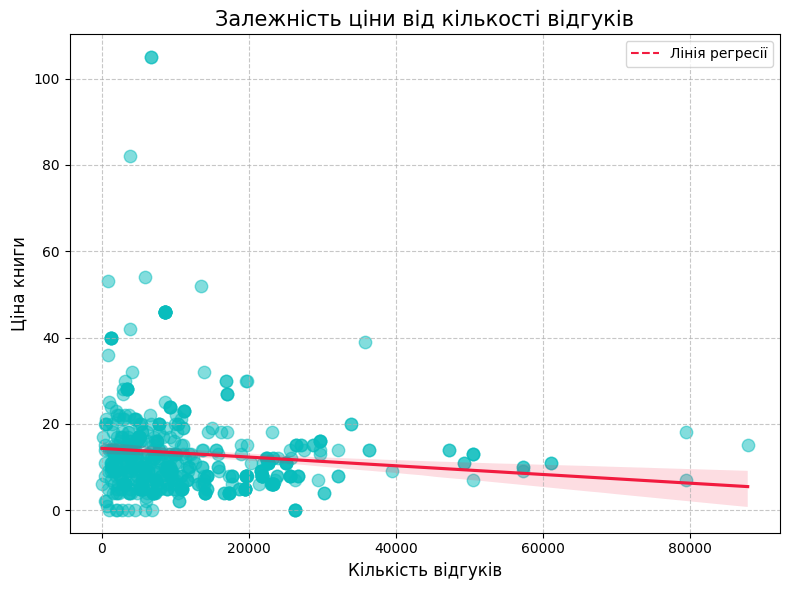

In [108]:
#Лінійна регресія між кількістю відгуків та ціною
plt.figure(figsize=(8, 6))

sns.regplot(x='reviews', y='price', data=table, scatter_kws={'s': 80, 'alpha': 0.5, 'color': '#08bdbd'}, line_kws={'color': '#f21b3f', 'linestyle': '-'})
plt.title('Залежність ціни від кількості відгуків', fontsize=15)
plt.xlabel('Кількість відгуків', fontsize=12)
plt.ylabel('Ціна книги', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
line = plt.Line2D([], [], color='#f21b3f', linestyle='--', label='Лінія регресії')
plt.legend(handles=[line])

plt.tight_layout()

plt.show()

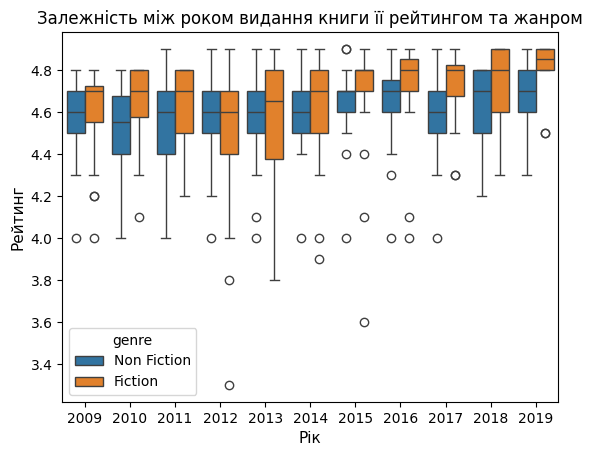

In [113]:
sns.boxplot(x="year", y="user_rating", hue="genre", data=table)
plt.title('Залежність між роком видання книги її рейтингом та жанром')
plt.xlabel('Рік', fontsize=11)
plt.ylabel('Рейтинг', fontsize=11)
plt.show()